<a href="https://colab.research.google.com/github/Abhishekpratapsingh321/Instagram_reach/blob/main/instagram_reach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import numpy as np
import pandas as pd
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter



df=pd.read_csv("instagram_reach.csv")

In [255]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


**Check the shape of dataset**

In [256]:
df.shape

(100, 8)

**Check dataset contains null value or not**

In [257]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

Caption contain 6 null value

**We can drop the null values as the total null values are only 6% of the total dataset**

In [258]:
df=df.dropna()

**Check the datatype of all the columns**

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     object
 7   Likes              94 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ KB


In [260]:
# Remove unnecessary columns
df= df.drop(['Unnamed: 0', 'S.No'], axis=1)

In [261]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [262]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))


se = pd.Series(Time_since_posted_in_hours)
df['Times since posted'] = se.values
df['Times since posted'] = pd.to_numeric(df['Times since posted'])
df = df.drop('Time since posted', axis=1)

In [263]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Likes,Times since posted
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


# Exploratory Data Analysis

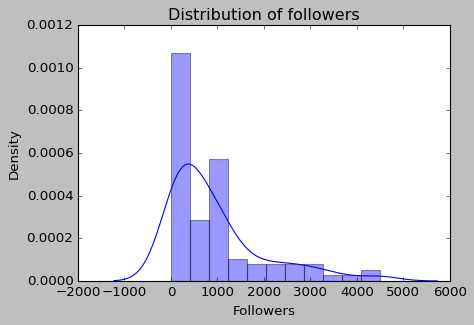

In [264]:
#Distribution of followers variable
plt.figure(figsize=(6, 4))
sns.distplot(df['Followers'])
plt.title("Distribution of followers")
plt.show()

The followers distribution in right skewed. Most of the account has followers between 0-300 or more

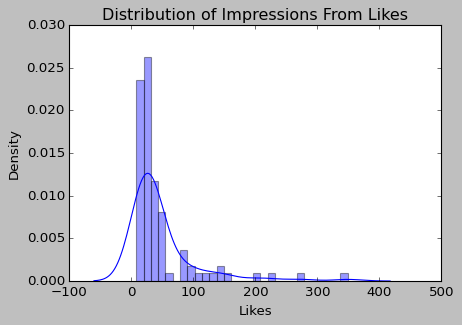

In [265]:
plt.figure(figsize=(6, 4))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

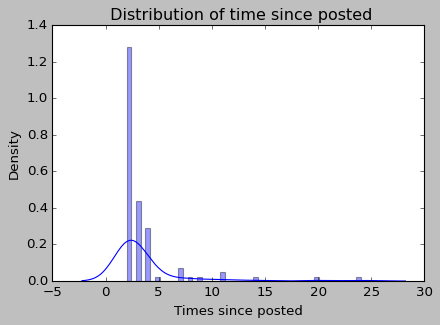

In [267]:
plt.figure(figsize=(6,4))
sns.distplot(df['Times since posted'])
plt.title(' Distribution of time since posted')
plt.show()

In [268]:
print('There are', df['USERNAME'].nunique(), 'username')

There are 90 username


Out of 94 data, there are 90 unique users

Relation between Likes and Followers

In [269]:
followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

#Caption variables

In analyzing this variable, I will use wordcloud to know which words are mostly used in caption

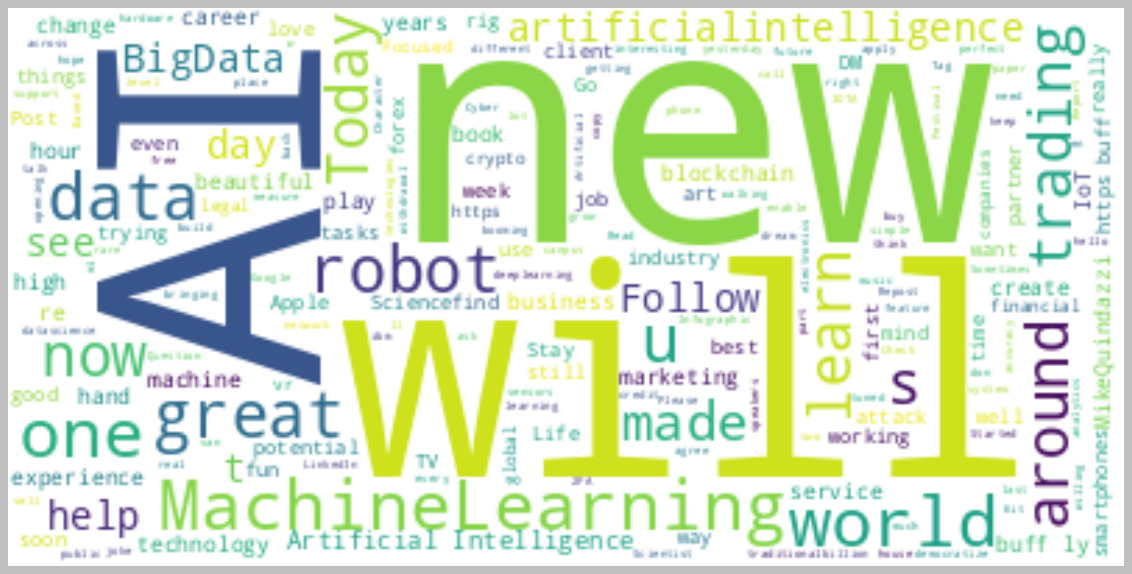

In [270]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



From the above wordcolud we can see that that AI,new,will are top 3 words used for caption

# Hastags variable
In analyzing this variable, I will use wordcloud to know which words are mostly used in hastags

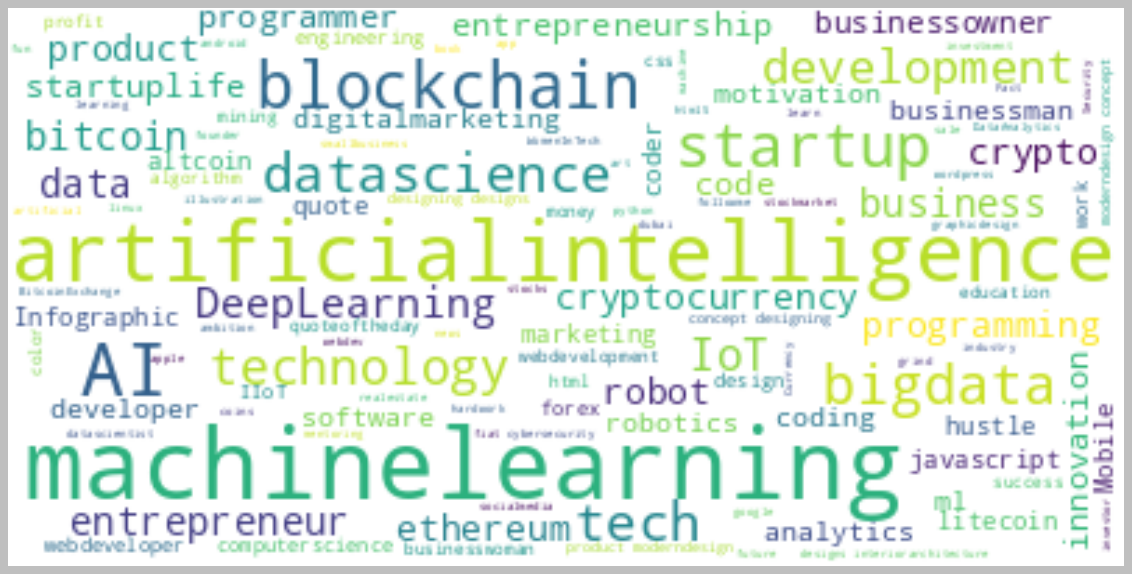

In [271]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From wordcloud above we know that words like 'artificialintelligence', 'machinelearning', 'AI' are the top three words on hashtags

# Relationship between two variables

Followers and likes
I will use scatterplot to visualize the relationship between these variables

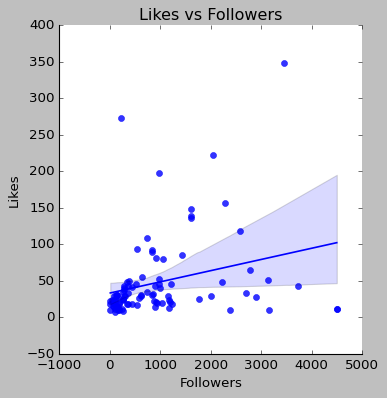

In [272]:
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

Now I will find out the correlation values between times since posted, follower, and likes

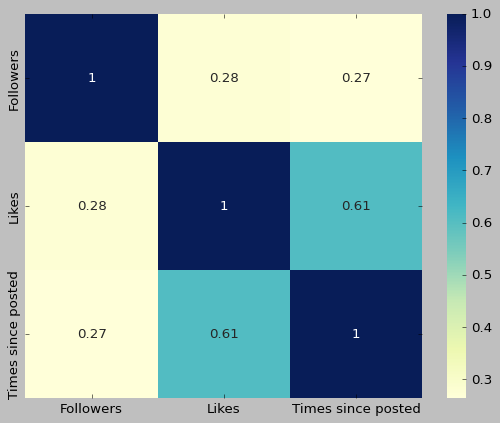

In [273]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is strong correlation between likes and times since posted in hours

In [274]:
conversion_rate = (df["Likes"].sum() / df["Followers"].sum()) * 100
print(conversion_rate)

5.0797341067861455


So we can see here that the conversion rate is mere 5.08%

# Modelling

Predicting reach with XGBRegressor

In [275]:
# Select the relevant features and target variables

features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Times since posted'

In [276]:
# Split the data into training and testing sets

X = df[features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [277]:
# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [278]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 2295.2229243071724


In [279]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 14.27362332233911
